1. **Installation and Setup**
2. **Loading and Preprocessing Data**
3. **Sentiment Analysis with TextBlob**
4. **Visualizing Results**
5. **Advanced Techniques**

In [1]:
!pip install textblob matplotlib
!python -m textblob.download_corpora
# 下载TextBlob库所需的语料库的目的是为了支持TextBlob库中的一些功能，例如词性标注、名词短语提取、情感分析等。

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [2]:
import pandas as pd

# Sample dataset
data = {
    'review': [
        "I love this product! It's amazing.",
        "This is the worst experience I've ever had.",
        "Not bad, but could be better.",
        "Absolutely fantastic! Highly recommended.",
        "I don't hate it, but I will never buy again."
    ]
}

# Create DataFrame
df = pd.DataFrame(data)


In [3]:
df

,review
0,I love this product! It's amazing.
1,This is the worst experience I've ever had.
2,"Not bad, but could be better."
3,Absolutely fantastic! Highly recommended.
4,"I don't hate it, but I will never buy again."


Using TextBlob for sentiment analysis is straightforward. It provides polarity and subjectivity scores.

In [4]:
from textblob import TextBlob

# Function to analyze sentiment
def analyze_sentiment(review):
    analysis = TextBlob(review)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply sentiment analysis
df['polarity'], df['subjectivity'] = zip(*df['review'].apply(analyze_sentiment))

# Show DataFrame
print(df)


                                         review  polarity  subjectivity
0            I love this product! It's amazing.    0.6125      0.750000
1   This is the worst experience I've ever had.   -1.0000      1.000000
2                 Not bad, but could be better.    0.4250      0.583333
3     Absolutely fantastic! Highly recommended.    0.3300      0.720000
4  I don't hate it, but I will never buy again.   -0.8000      0.900000


Here's a table that outlines the differences and meanings of **polarity** and **subjectivity** in sentiment analysis:

| **Metric**       | **Definition**                                               | **Range**                                     | **Interpretation**                                           | **Use Cases**                                                |
| ---------------- | ------------------------------------------------------------ | --------------------------------------------- | ------------------------------------------------------------ | ------------------------------------------------------------ |
| **Polarity**     | Measures the sentiment of the text.                          | `-1` (very negative) to `1` (very positive)   | - **Negative**: Text expresses negative sentiment. <br> - **Neutral**: Text is neutral in sentiment. <br> - **Positive**: Text expresses positive sentiment. | - Determining overall sentiment of text. <br> - Classifying reviews as positive, negative, or neutral. |
| **Subjectivity** | Measures how much of the text is opinion-based vs. fact-based. | `0` (very objective) to `1` (very subjective) | - **Objective**: Text contains factual information with little to no personal opinion. <br> - **Subjective**: Text contains personal opinions or emotions. | - Distinguishing between factual reports and opinion pieces. <br> - Understanding the degree of personal bias in the text. |

### **Polarity vs. Subjectivity**

| Aspect          | **Polarity**                             | **Subjectivity**                                          |
| --------------- | ---------------------------------------- | --------------------------------------------------------- |
| **Dimension**   | Sentiment (positive vs. negative)        | Opinion (fact vs. opinion)                                |
| **Nature**      | Emotional tone                           | Degree of personal opinion or emotion                     |
| **Value Range** | -1 to 1                                  | 0 to 1                                                    |
| **Usage**       | To understand the emotional tone of text | To gauge how subjective or objective the text is          |
| **Example**     | "I hate the traffic." (Polarity: -0.8)   | "I believe the traffic is bad today." (Subjectivity: 0.9) |

This simplified table helps distinguish the two metrics:

- **Polarity** focuses on the sentiment or emotional tone of the text, measuring whether it is positive, neutral, or negative.
- **Subjectivity** assesses how much of the text is based on personal opinion versus factual information, determining whether it is objective or subjective.

In [5]:
from textblob import TextBlob

# Sample texts
texts = [
    "I absolutely love this product!",
    "This is the worst experience I've ever had.",
    "It's okay, nothing special.",
    "The event was on Friday.",
    "I feel amazing about this."
]

# Analyze sentiment
for text in texts:
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity
    print(f"Text: '{text}'\nPolarity: {polarity}, Subjectivity: {subjectivity}\n")


Text: 'I absolutely love this product!'
Polarity: 0.625, Subjectivity: 0.6

Text: 'This is the worst experience I've ever had.'
Polarity: -1.0, Subjectivity: 1.0

Text: 'It's okay, nothing special.'
Polarity: 0.4285714285714286, Subjectivity: 0.5357142857142857

Text: 'The event was on Friday.'
Polarity: 0.0, Subjectivity: 0.0

Text: 'I feel amazing about this.'
Polarity: 0.6000000000000001, Subjectivity: 0.9



Visualize the sentiment analysis results using matplotlib.

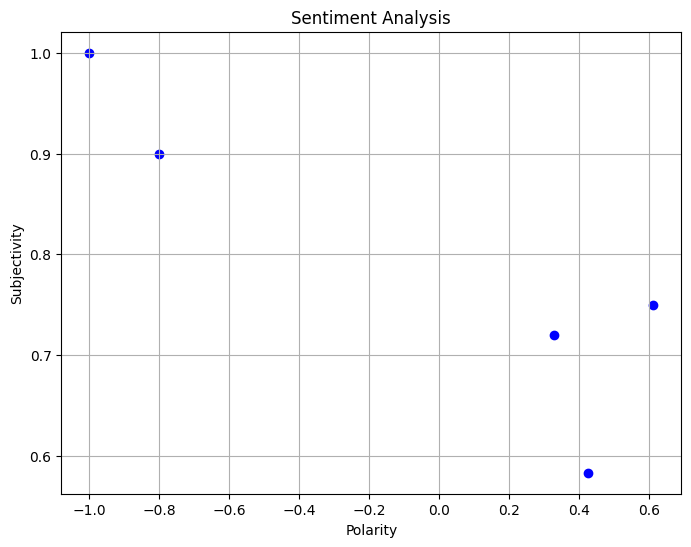

In [6]:
import matplotlib.pyplot as plt

# Scatter plot for polarity and subjectivity
plt.figure(figsize=(8, 6))
plt.scatter(df['polarity'], df['subjectivity'], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid(True)
plt.show()


You can classify the reviews as positive, negative, or neutral based on the polarity score.

In [7]:
# Classification function
def classify_sentiment(polarity):
    if polarity > 0.3:
        return 'Positive'
    elif polarity < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

# Apply classification
df['sentiment'] = df['polarity'].apply(classify_sentiment)

# Show DataFrame with sentiment classification
print(df)


                                         review  polarity  subjectivity  \
0            I love this product! It's amazing.    0.6125      0.750000   
1   This is the worst experience I've ever had.   -1.0000      1.000000   
2                 Not bad, but could be better.    0.4250      0.583333   
3     Absolutely fantastic! Highly recommended.    0.3300      0.720000   
4  I don't hate it, but I will never buy again.   -0.8000      0.900000   

  sentiment  
0  Positive  
1  Negative  
2  Positive  
3  Positive  
4  Negative  


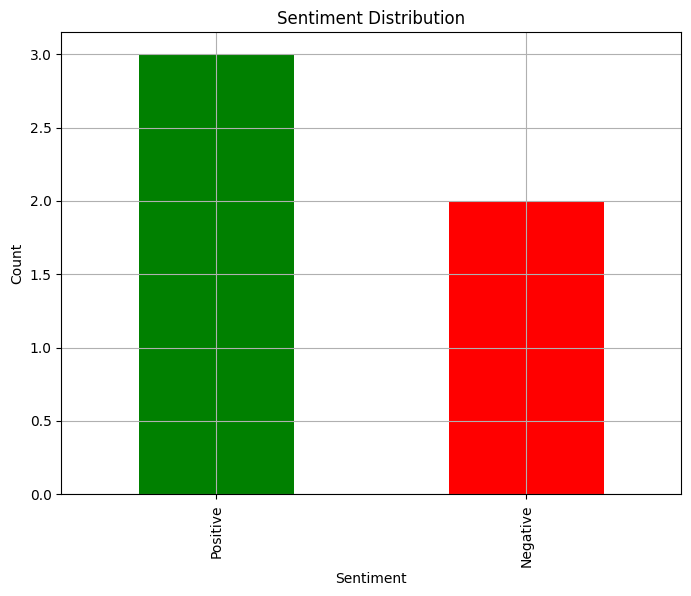

In [8]:
# Count sentiment types
sentiment_counts = df['sentiment'].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Yelp Review Data

In [10]:
from google.colab import drive

# 连接到Google Drive
drive.mount('/content/drive')
dataset_path = '/content/drive/My Drive/教学/offerrealize-DS项目课/项目/yelp/data/'
# 导入yelp_review.csv数据集
reviews = pd.read_csv(dataset_path+"yelp_review.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
from tqdm import tqdm
tqdm.pandas()  # Integration with pandas progress_apply

def analyze_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

n_sample = 10^4
df_copy = reviews['text'].to_frame().sample(n_sample)

# Apply the function to each review
df_copy['polarity'], df_copy['subjectivity'] = zip(*df_copy['text'].apply(analyze_sentiment))
# Adjust display options
pd.set_option('display.max_colwidth', None)  # Display full column width
# Display the dataframe with polarity and subjectivity
df_copy.head()


,text,polarity,subjectivity
2946740,"It's quite unfortunate that the food is good but the service is terrible. \n\nHad dinner there on a night where less than 50% of the tables were full and yet it took over 2.5 hours for us to finish a complete meal - the service was ridiculously slow and the waiters would get dishes ordered confused. When we asked to have the tables cleared for dessert, it took so long that we ended up cleaning up our own plates!!!!! \n\nAgain, food was good but not worth the waste of time waiting for poor service.",-0.022619,0.529762
1174502,"The best tacos, burritos and came Asada fries in the NW, always consistent, the best service too!",0.750000,0.283333
5246798,"I work in Downtown Summerlin & have passed this place more than a few times so I decided to try it out. I got The Pit combo. Fried chicken sandwich with cheddar, bacon, & bbq sauce with fries & coleslaw. The sandwich was really good! The chicken was moist & flavorful. Good bun & crisp veggies. The shoestring fries were nice & salty. The coleslaw was the only thing I didn't care for. Incredibly bland, but you only get a little portion of it anyways. I'll definitely be back again!",0.090064,0.650000
2068128,"I am happy that the Nosh Box still makes its rounds during the wintertime.\n\nTheir chicken flatbread was not really a flatbread - more of a wrap - it had too much sauce for my taste and they should have warmed up their veggies. I've also tried their apple empanada, which tasted to me kind of like a toaster strudel. That being said, I've had a very tasty burger (the Namor burger) from this food truck once as well as some pretty decent tater tots.",0.224074,0.635185
253485,"This review is for 3.5 stars. \n\nI can at about 12:30 on a Saturday night. I wasn't aware before but the container park closes at 1am so they kind of rushed us in and out. They still served us drinks, in plastic cups, so we could walk around around, but it felt hurried. Their beer selection rotates but offers the usual Vegas scene beers with the micros and a couple Tenaya and Big Dog's. Their cocktails weren't all that creative either. They were about $10 and the usual creations. If looking. For a drink, I'd rather go to Oak and Ivy which is a literal 30 second walk, where you can get knowledgable bartenders and better quality liquor.",0.161111,0.361111


Average Polarity:  0.33355890744865896
Average Subjectivity:  0.5577599968182266


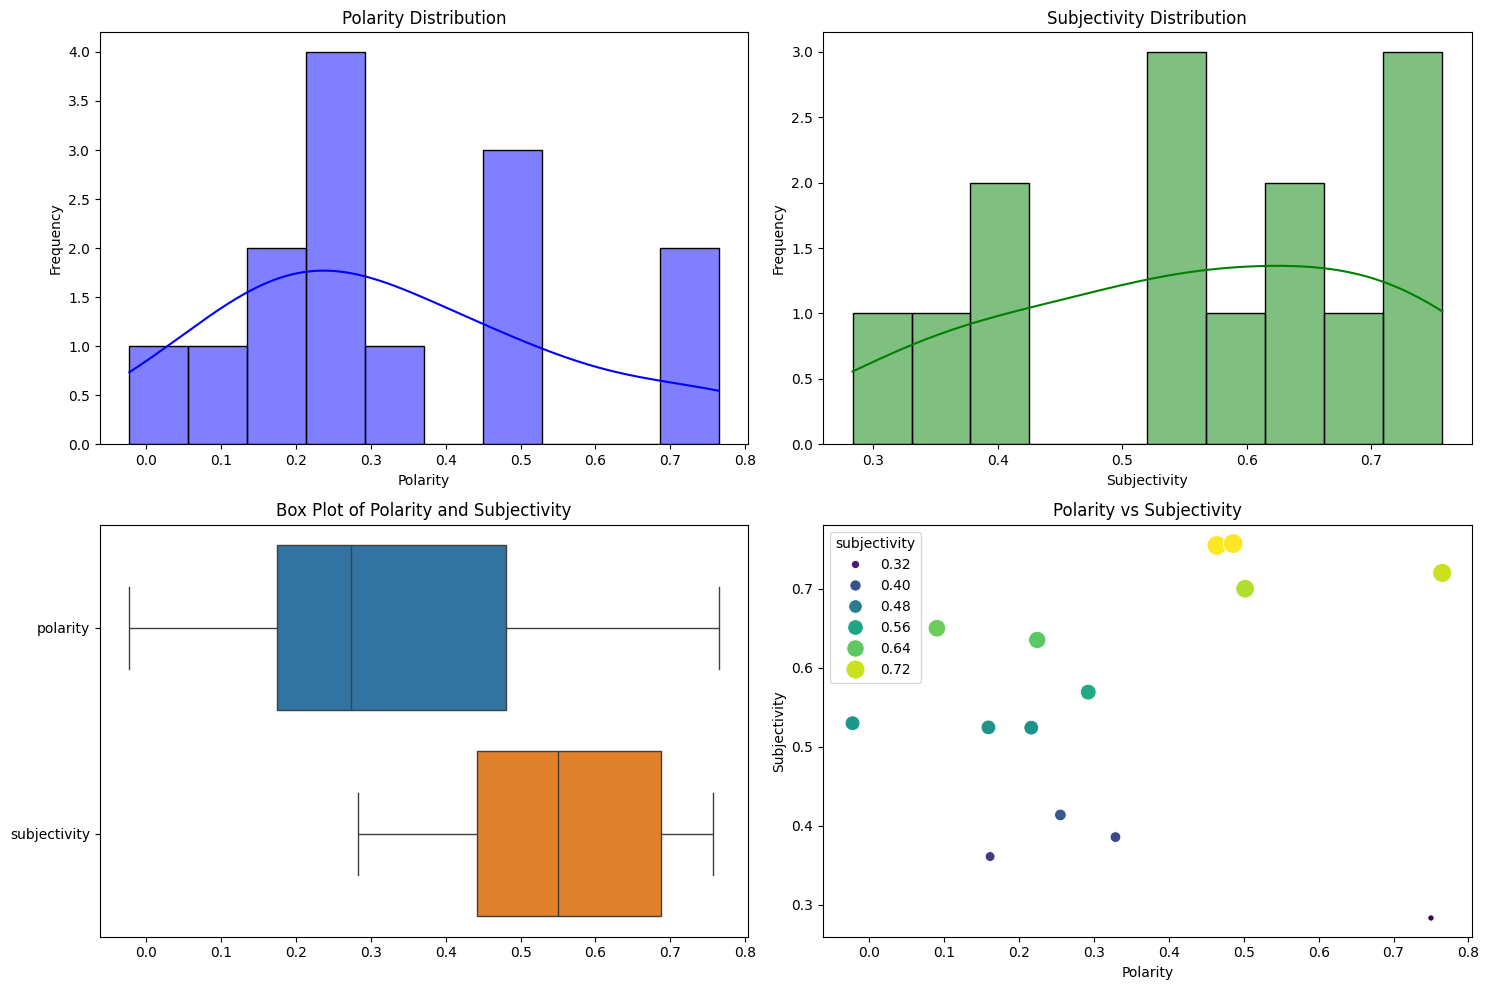

In [12]:
# Basic statistics

import seaborn as sns
print("Average Polarity: ", df_copy['polarity'].mean())
print("Average Subjectivity: ", df_copy['subjectivity'].mean())

# Plot distributions and relationships
plt.figure(figsize=(15, 10))

# Polarity distribution
plt.subplot(2, 2, 1)
sns.histplot(df_copy['polarity'], bins=10, kde=True, color='blue')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Subjectivity distribution
plt.subplot(2, 2, 2)
sns.histplot(df_copy['subjectivity'], bins=10, kde=True, color='green')
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

# Box plots
plt.subplot(2, 2, 3)
sns.boxplot(data=df_copy[['polarity', 'subjectivity']], orient='h')
plt.title('Box Plot of Polarity and Subjectivity')

# Scatter plot
plt.subplot(2, 2, 4)
sns.scatterplot(x='polarity', y='subjectivity', data=df_copy, hue='subjectivity', palette='viridis', size='subjectivity', sizes=(20, 200))
plt.title('Polarity vs Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()
plt.show()

In [15]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

def extract_entities(text):
    blob = TextBlob(text)
    return list(blob.noun_phrases)

df_copy['text'].sample(10).apply(extract_entities)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text
1198616,[mexican restaurants]
5246798,"[summerlin, pit, fried, chicken sandwich, bbq sauce, good bun, crisp veggies, n't care, incredibly]"
4443718,"[ladies, gentlemen, hines, gordon ramsay burgr, burger challenge, california, jalapeno poppers, surprise * popper, beef burger, burger options, n't end, fries, tasty burger, vegas, gordon ramsay, strongly, miracle, shops]"
2068128,"[nosh, chicken flatbread, apple empanada, toaster strudel, tasty burger, namor, food truck, pretty decent tater tots]"
2946740,"[complete meal, own plates, poor service]"
3299293,"[general rule, good seafood, mississippi, californians, good seafood, san diego, fisherman, wharf, atlantic, fish, henderson, henderson, lucille, lucille, ecuadorian mahi mahi, maine, alaskan, multiple trips, england clam, maine, red potatoes, brenda, crab cakes, crab cakes, frozen food aisle, chesapeake, maryland, small side, pacific ..., new england, england clam, great review, fresh seafood]"
2970900,"[tina, daycare centers, star preschool]"
1174502,[asada]
3789306,"[i 'm, very]"
3406808,"[excellent, good food, nice atmosphere, servers, wo n't speculate, classy wedding proposal, young man, nice genuine people]"


### **Features to Extract:**

1. **Polarity**: Measure of the sentiment (range from -1.0 to 1.0).
2. **Subjectivity**: Measure of subjectivity (range from 0.0 to 1.0).
3. **Word Count**: Total number of words in the review.
4. **Character Count**: Total number of characters in the review.
5. **Sentence Count**: Number of sentences in the review.
6. **Average Word Length**: Average length of words in the review.
7. **Positive/Negative Sentiment**: Classify sentiment as positive or negative based on polarity.
8. **Number of Noun Phrases**: Number of noun phrases in the review.
9. **Part-of-Speech (POS) Tags**: Count of different POS tags (e.g., nouns, verbs, adjectives).
10. **Named Entities**: Extract named entities and count their occurrences.
11. **Language Detection**: Detect the language of the review.
12. **Translation to English**: Translate the review to English (if not already in English).
13. **Unique Word Count**: Number of unique words in the review.
14. **Adjective Count**: Number of adjectives in the review.
15. **Verb Count**: Number of verbs in the review.
16. **Noun Count**: Number of nouns in the review

In [17]:
nltk.download('averaged_perceptron_tagger_eng')

# Define function to extract features
def extract_features(text):
    blob = TextBlob(text)

    # Polarity and Subjectivity
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    # Word count
    word_count = len(blob.words)

    # Character count
    char_count = len(text)

    # Sentence count
    sentence_count = len(blob.sentences)

    # Average word length
    avg_word_length = sum(len(word) for word in blob.words) / word_count if word_count else 0

    # Positive/Negative Sentiment
    sentiment = 'positive' if polarity > 0 else 'negative' if polarity < 0 else 'neutral'

    # Number of noun phrases
    noun_phrase_count = len(blob.noun_phrases)

    # Part-of-Speech Tags
    pos_counts = pd.Series([tag for word, tag in blob.tags]).value_counts().to_dict()

    # Named Entities (simplified as noun phrases)
    entities = len(blob.noun_phrases)

    # Unique Word Count
    unique_words = len(set(blob.words))

    # Adjective, Verb, Noun Counts
    adjective_count = sum(1 for word, pos in blob.tags if pos.startswith('JJ'))
    verb_count = sum(1 for word, pos in blob.tags if pos.startswith('VB'))
    noun_count = sum(1 for word, pos in blob.tags if pos.startswith('NN'))

    return {
        'polarity': polarity,
        'subjectivity': subjectivity,
        'word_count': word_count,
        'char_count': char_count,
        'sentence_count': sentence_count,
        'avg_word_length': avg_word_length,
        'sentiment': sentiment,
        'noun_phrase_count': noun_phrase_count,
        'pos_counts': pos_counts,
        'entities': entities,
        'unique_word_count': unique_words,
        'adjective_count': adjective_count,
        'verb_count': verb_count,
        'noun_count': noun_count
    }

# Apply the function to each review

tst = reviews['text'].sample(10)
features = tst.apply(extract_features)

# Convert the list of dictionaries into a DataFrame and merge with original reviews DataFrame
features_df = pd.DataFrame(features.tolist())
tmp = pd.concat([tst.reset_index(drop=True), features_df.reset_index(drop=True)], axis=1)
pd.set_option('display.max_colwidth', 200)  # Display full column width
# Display the DataFrame with new features
tmp.head()

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


,text,polarity,subjectivity,word_count,char_count,sentence_count,avg_word_length,sentiment,noun_phrase_count,pos_counts,entities,unique_word_count,adjective_count,verb_count,noun_count
0,You've gotta love Total Wine.\n\nThe selection is beyond amazing. They seem to have just about everything!\nThey always have tables set up where you can have some samples.\n\nThe prices are way be...,0.524107,0.678571,69,376,7,4.304348,positive,8,"{'NNP': 8, 'IN': 7, 'NNS': 6, 'NN': 6, 'VBP': 6, 'PRP': 5, 'RB': 4, 'JJ': 4, 'DT': 3, 'CD': 2, 'VBD': 2, 'POS': 2, 'CC': 2, 'VB': 2, 'VBZ': 2, 'VBN': 2, 'RP': 1, 'WRB': 1, 'MD': 1, 'RBR': 1, 'VBG'...",8,54,4,15,20
1,"In need of an entertaining night and awesome food at a good price? Head over for their late night happy hour and sit outside on a cooler night, request the blonde waitress (she's hilarious and mak...",0.461667,0.591667,80,453,5,4.537500,positive,9,"{'NN': 20, 'IN': 12, 'DT': 10, 'JJ': 8, 'CC': 6, 'PRP': 5, 'VB': 5, 'VBP': 3, 'VBZ': 2, 'NNS': 2, 'CD': 2, 'RB': 2, 'PRP$': 1, 'JJS': 1, 'TO': 1}",9,66,9,10,22
2,"So I actually have not BEEN here, but I wanted to leave a review for Cynthia Diaz with the sales coordination - She was FANTASTIC to deal with!!! I had so many questions when booking my rehearsal ...",0.425568,0.669545,135,734,7,4.251852,positive,17,"{'NN': 18, 'RB': 13, 'IN': 12, 'PRP': 11, 'DT': 9, 'NNS': 8, 'VBD': 8, 'NNP': 8, 'VB': 7, 'CC': 7, 'VBP': 6, 'TO': 5, 'VBG': 5, 'PRP$': 4, 'VBN': 4, 'CD': 3, 'JJ': 2, 'MD': 2, 'WRB': 1, 'RBR': 1, ...",17,98,3,31,34
3,"Really enjoyed dinner here. It's casual and non-pretentious, kind of welcomed in the Scottsdale Quarter. I tried their burger of the week, which was actually a chicken sandwich, but holy crap wa...",0.026894,0.583333,61,342,5,4.377049,positive,6,"{'NN': 11, 'JJ': 7, 'RB': 6, 'DT': 6, 'IN': 5, 'NNP': 4, 'PRP': 4, 'CC': 3, 'VBZ': 3, 'VBD': 3, 'VBN': 1, 'PRP$': 1, 'WDT': 1, 'VB': 1, 'WP': 1, 'CD': 1, 'NNS': 1, 'JJR': 1, 'PDT': 1}",6,51,8,8,16
4,"This place is a deinite must go. The view is worth the price of the food, which has always been well prepared each time I visit, about once a year. If you want to escape from the smoke and noise o...",0.320833,0.516667,92,465,7,3.978261,positive,3,"{'NN': 17, 'DT': 15, 'RB': 10, 'IN': 9, 'VB': 6, 'PRP': 5, 'VBZ': 4, 'MD': 3, 'JJ': 3, 'VBP': 3, 'TO': 3, 'NNS': 3, 'VBN': 2, 'CC': 2, 'PRP$': 2, 'WDT': 1, 'EX': 1, 'JJR': 1, 'NNP': 1, 'RBR': 1}",3,72,4,15,21


In [18]:
!pip install textatistic afinn

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for textatistic: filename=textatistic-0.0.1-py3-none-any.whl size=29047 sha256=bd8efa7763b09faf09126de15815f546ec338adfe5e565276da0e97eebc9c61c
  Stored in directory: /root/.cache/pip/wheels/ec/03/0a/d09aa1c311450d9618131b77a6ea42990542380098022b77ba
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53429 sha256=919971a280b8f0cddaadd2b699c4440cf92bb32d249c47bf99ae7039d93cd506
  Stored in directory: /root/.cache/pip/wheels/ee/d3/a0/f9255ebac29886acb1c28b35b37523f6399677fa06be379f25
  Created wheel for pyhyphen: filename=PyHyphen-4.0.4-cp37-abi3-linux_x86_64.whl size=65470 sha256=f47e024db84f6aee1052e3d28ca9b9bf4b11361b36e7a1c4b91bad3f599224aa
  Stored in directory: /root/.cac

In [19]:
from textblob import TextBlob
from afinn import Afinn
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from textatistic import Textatistic

# Demo text in English and Chinese
english_texts = [
    "The moment I stepped into the restaurant, I was greeted by the warm and inviting ambiance, which was further enhanced by the soft lighting and elegant decor. The hostess was extremely polite and efficient, seating us promptly at a table with a lovely view of the city skyline. The waiter was knowledgeable about the menu and made excellent recommendations, ensuring that every dish we tried was absolutely delicious. The flavors were well-balanced and the presentation was impeccable. The service throughout the evening was attentive and seamless, making our dining experience truly remarkable. I will definitely be returning and highly recommend this restaurant to anyone seeking a top-notch culinary adventure.",

    "From the initial consultation to the final installation, working with this company has been an absolute pleasure. The team is made up of true professionals who clearly have a passion for what they do. They listened carefully to my needs, offered valuable suggestions, and customized a solution that perfectly aligned with my expectations. The installation process was quick, clean, and efficient, with minimal disruption to my daily routine. The product itself is of the highest quality, exceeding my performance expectations. I'm thrilled with the results and would wholeheartedly recommend this company to anyone in need of their services.",

    "Regrettably, my experience with this hotel did not meet my expectations. Despite the promising location, the room was disappointing, with outdated furnishings and a musty smell that hinted at poor maintenance. The housekeeping staff seemed neglectful, as evidenced by the overlooked dust bunnies in the corners and less-than-crisp linens. Additionally, the promised Wi-Fi service was frustratingly unreliable, cutting out frequently and disrupting my work. The front desk staff, although friendly, seemed inefficient in addressing my concerns, leaving me with the impression that my satisfaction was not a priority. I cannot recommend this hotel and will be looking elsewhere for accommodations on my next visit.",

    "I was quite disappointed with the recent purchase I made from this online retailer. The product description was misleading, and the actual item I received was of inferior quality compared to what I had anticipated. The return process was also unnecessarily complicated, requiring multiple emails and phone calls just to obtain the necessary shipping information. Even after following all their instructions, my refund was delayed, leaving me frustrated and out of pocket for an extended period. The lack of transparency and poor customer service does not inspire confidence, and I cannot recommend shopping with this retailer.",

    "The movie had its moments of brilliance, particularly in the visual effects department, where the CGI was impressive and added a layer of spectacle to the action scenes. The soundtrack, too, was well-composed and added to the overall atmosphere. However, the plot was somewhat convoluted and the character development felt rushed, making it difficult to fully engage with the story. While there were certainly high points, these were counterbalanced by the narrative's shortcomings, leading to a mixed experience. It's a film that might appeal to fans of the genre but could leave others feeling indifferent."
]



afinn = Afinn()

# Function to extract features
def extract_features(text):
    blob = TextBlob(text)

    # Polarity and Subjectivity
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity

    # Word count
    word_count = len(blob.words)

    # Character count
    char_count = len(text)

    # Sentence count
    sentence_count = len(blob.sentences)

    # Average word length
    avg_word_length = sum(len(word) for word in blob.words) / word_count if word_count else 0

    # Positive/Negative Sentiment
    sentiment = 'positive' if polarity > 0 else 'negative' if polarity < 0 else 'neutral'

    # Number of noun phrases
    noun_phrase_count = len(blob.noun_phrases)

    # Part-of-Speech Tags
    pos_counts = pd.Series([tag for word, tag in blob.tags]).value_counts().to_dict()

    # Named Entities (simplified as noun phrases)
    entities = len(blob.noun_phrases)

    # Unique Word Count
    unique_words = len(set(blob.words))

    # Adjective, Verb, Noun Counts
    adjective_count = sum(1 for word, pos in blob.tags if pos.startswith('JJ'))
    verb_count = sum(1 for word, pos in blob.tags if pos.startswith('VB'))
    noun_count = sum(1 for word, pos in blob.tags if pos.startswith('NN'))

    # Emotional Lexicon (AFINN)
    afinn_score = sum(afinn.score(word) for word in blob.words)

    # Term Frequency
    from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
    cv = CountVectorizer()
    tf = cv.fit_transform([text])
    tfidf_transformer = TfidfTransformer(smooth_idf=True, use_idf=True)
    tfidf_transformer.fit(tf)
    tfidf_scores = tfidf_transformer.transform(tf)

    # Text Complexity (Flesch Reading Ease)
    text_stats = Textatistic(text)
    reading_ease = text_stats.flesch_score

    return {
        'polarity': polarity,
        'subjectivity': subjectivity,
        'word_count': word_count,
        'char_count': char_count,
        'sentence_count': sentence_count,
        'avg_word_length': avg_word_length,
        'sentiment': sentiment,
        'noun_phrase_count': noun_phrase_count,
        'pos_counts': pos_counts,
        'entities': entities,
        'unique_word_count': unique_words,
        'adjective_count': adjective_count,
        'verb_count': verb_count,
        'noun_count': noun_count,
        'afinn_score': afinn_score,
        # The AFINN lexicon assigns words with a score that runs between -5 and 5,
        # with negative scores indicating negative sentiment and positive scores indicating positive sentiment.
        'tfidf_scores': tfidf_scores,
        'reading_ease': reading_ease
    }

# Applying the function to demo texts
demo_features = []
for text in english_texts:
    features = extract_features(text)
    demo_features.append(features)

# Creating a DataFrame to display the results
df_demo = pd.DataFrame(demo_features)
df_demo.head()



,polarity,subjectivity,word_count,char_count,sentence_count,avg_word_length,sentiment,noun_phrase_count,pos_counts,entities,unique_word_count,adjective_count,verb_count,noun_count,afinn_score,tfidf_scores,reading_ease
0,0.420938,0.671250,109,712,6,5.440367,positive,6,"{'NN': 21, 'DT': 17, 'JJ': 15, 'VBD': 11, 'IN': 9, 'CC': 7, 'VBG': 7, 'RB': 6, 'PRP': 5, 'VBN': 2, 'VB': 2, 'NNS': 2, 'MD': 1, 'WDT': 1, 'PRP$': 1, 'RBR': 1, 'TO': 1}",6,81,15,22,23,29.0,"(0, 0)\t0.05547001962252291\n (0, 1)\t0.05547001962252291\n (0, 2)\t0.05547001962252291\n (0, 3)\t0.05547001962252291\n (0, 4)\t0.3882901373576604\n (0, 5)\t0.05547001962252291\n (0, 6)\t0...",54.679122
1,0.229167,0.619444,99,641,6,5.363636,positive,8,"{'NN': 18, 'DT': 12, 'IN': 11, 'JJ': 10, 'NNS': 7, 'PRP$': 5, 'PRP': 4, 'RB': 4, 'VBN': 4, 'TO': 4, 'VBZ': 3, 'VBP': 3, 'VBD': 3, 'CC': 3, 'WP': 2, 'VBG': 2, 'WDT': 1, 'JJS': 1, 'MD': 1, 'VB': 1}",8,75,11,16,25,22.0,"(0, 0)\t0.07124704998790965\n (0, 1)\t0.07124704998790965\n (0, 2)\t0.07124704998790965\n (0, 3)\t0.21374114996372895\n (0, 4)\t0.07124704998790965\n (0, 5)\t0.07124704998790965\n (0, 6)\t...",53.860748
2,-0.191667,0.559259,105,712,6,5.657143,negative,8,"{'NN': 21, 'IN': 13, 'DT': 12, 'JJ': 11, 'RB': 8, 'VBD': 7, 'NNS': 7, 'PRP$': 6, 'VBG': 5, 'CC': 4, 'VB': 3, 'PRP': 2, 'MD': 2, 'WDT': 1, 'VBN': 1, 'NNP': 1, 'RP': 1}",8,78,11,16,29,-5.0,"(0, 0)\t0.06622661785325219\n (0, 1)\t0.06622661785325219\n (0, 2)\t0.06622661785325219\n (0, 3)\t0.06622661785325219\n (0, 4)\t0.26490647141300877\n (0, 5)\t0.06622661785325219\n (0, 6)\t...",50.369681
3,-0.261111,0.444444,97,626,5,5.371134,negative,11,"{'NN': 21, 'JJ': 9, 'IN': 9, 'DT': 9, 'VBD': 8, 'RB': 7, 'PRP': 6, 'VBG': 5, 'CC': 5, 'VBN': 4, 'NNS': 3, 'VB': 3, 'TO': 2, 'PRP$': 2, 'WP': 1, 'PDT': 1, 'VBZ': 1, 'MD': 1}",11,74,9,21,24,-6.0,"(0, 0)\t0.07559289460184544\n (0, 1)\t0.07559289460184544\n (0, 2)\t0.07559289460184544\n (0, 3)\t0.07559289460184544\n (0, 4)\t0.07559289460184544\n (0, 5)\t0.37796447300922725\n (0, 6)\t...",49.872000
4,0.115833,0.402917,97,608,5,5.164948,positive,7,"{'NN': 17, 'DT': 15, 'VBD': 9, 'JJ': 9, 'NNS': 7, 'IN': 7, 'RB': 6, 'TO': 5, 'CC': 4, 'VBG': 3, 'VB': 3, 'PRP': 2, 'MD': 2, 'NNP': 1, 'WRB': 1, 'PRP$': 1, 'EX': 1, 'VBN': 1, 'POS': 1, 'VBZ': 1, 'W...",7,73,9,17,25,6.0,"(0, 0)\t0.06362847629757777\n (0, 1)\t0.12725695259515554\n (0, 2)\t0.19088542889273333\n (0, 3)\t0.06362847629757777\n (0, 4)\t0.06362847629757777\n (0, 5)\t0.06362847629757777\n (0, 6)\t...",58.684500




| Feature           | Meaning and Purpose                                          | 中文理解及作用                                               |
| ----------------- | ------------------------------------------------------------ | ------------------------------------------------------------ |
| polarity          | Measures the sentiment polarity (positive, negative, or neutral) of the text. Useful for sentiment analysis. | 衡量文本的情感极性（积极、消极或中立），用于情感分析。       |
| subjectivity      | Measures how subjective or opinionated the text is. Ranges from 0 (objective) to 1 (subjective). | 衡量文本的主观性或意见性，范围从0（客观）到1（主观）。       |
| word_count        | Counts the total number of words in the text.                | 统计文本中的总词数。                                         |
| char_count        | Counts the total number of characters in the text.           | 统计文本中的总字符数。                                       |
| sentence_count    | Counts the total number of sentences in the text.            | 统计文本中的总句子数。                                       |
| avg_word_length   | Calculates the average length of words in the text, providing insight into text complexity. | 计算文本中单词的平均长度，提供对文本复杂性的洞察。           |
| sentiment         | Categorizes the overall sentiment of the text as positive, negative, or neutral. | 将文本的整体情感分类为积极、消极或中立。                     |
| noun_phrase_count | Counts the number of noun phrases (groups of words containing a noun and modifying words). | 统计文本中名词短语（包含名词及其修饰词）的数量。             |
| pos_counts        | Provides a dictionary of Part-of-Speech (POS) tags and their counts, indicating word usage patterns. | 提供词性标签（POS）及其计数的字典，显示词语的使用模式。      |
| entities          | Simplified count of named entities (often similar to noun phrases), useful for entity recognition tasks. | 简化的命名实体计数（通常类似于名词短语），适用于实体识别任务。 |
| unique_word_count | Counts the number of unique words in the text, indicating lexical diversity. | 统计文本中唯一词的数量，显示词汇多样性。                     |
| adjective_count   | Counts the number of adjectives in the text, providing insight into descriptive language usage. | 统计文本中形容词的数量，提供对描述性语言使用的洞察。         |
| verb_count        | Counts the number of verbs in the text, indicating actions or processes described. | 统计文本中动词的数量，显示描述的动作或过程。                 |
| noun_count        | Counts the number of nouns in the text, identifying objects or entities mentioned. | 统计文本中名词的数量，识别所提及的对象或实体。               |
| afinn_score       | Sum of AFINN scores for words in the text, providing a sentiment intensity measure. | 计算文本中单词的AFINN分数总和，提供情感强度度量。            |
| tfidf_scores      | TF-IDF scores for words in the text, indicating the importance of each word in the context of the document. | 统计文本中单词的TF-IDF分数，显示每个单词在文档上下文中的重要性。 |
| reading_ease      | Flesch Reading Ease score, measuring the readability of the text. Higher scores indicate easier readability. | Flesch阅读便捷度分数，衡量文本的可读性。较高的分数表示更容易阅读。 |
